In [1]:
from platform import python_version
python_version()

'3.7.9'

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

from connectivity import (plot_graph_circos, make_graph, 
                          graph_measures, z_scores,
                          similarity_between_subjects, is_symmetric)
# NB: add more subjects in the data folder in neurolib package
from neurolib.utils.loadData import Dataset

In [2]:
%%time
# NB: add more subjects in the data folder in neurolib package
ds = Dataset("gw")
columns = ['mean_degree', 'degree', 'closeness', 'betweenness',
           'mean_shortest_path', 'neighbor_degree', 'neighbor_degree_new', 'clustering_coefficient', 'omega', 'sigma',
           'mean_clustering_coefficient', 'backbone', 'Cmat', 'Dmat']
df = pd.DataFrame(columns=columns)

for n, (cmat, dmat) in enumerate(zip([ds.Cmat] + ds.Cmats, [ds.Dmat] + ds.Dmats)):
    G = make_graph(cmat)
    G, gm = graph_measures(G) # , dmat
    gm['Cmat'] = cmat
    gm['Dmat'] = dmat
    df.loc[n] = gm
    print(f"processed graph {n}")
    M = G.graph['matrix']
    assert(np.array_equal(M,cmat))
df.head()

processed graph 0
processed graph 1
processed graph 2
processed graph 3
processed graph 4
processed graph 5
processed graph 6
processed graph 7
processed graph 8
processed graph 9
processed graph 10
processed graph 11
processed graph 12
processed graph 13
processed graph 14
processed graph 15
processed graph 16
processed graph 17
processed graph 18
processed graph 19
processed graph 20
processed graph 21
processed graph 22
processed graph 23
processed graph 24
processed graph 25
processed graph 26
processed graph 27
CPU times: user 4.3 s, sys: 990 ms, total: 5.29 s
Wall time: 4.15 s


,mean_degree,degree,closeness,betweenness,mean_shortest_path,neighbor_degree,neighbor_degree_new,clustering_coefficient,omega,sigma,mean_clustering_coefficient,backbone,Cmat,Dmat
0,0.013644,"[0.025899642137142593, 0.02329584244001279, 0....","[0.054282866469382754, 0.05414956866009053, 0....","[0.16715352158390132, 0.16066212268743915, 0.2...",25.669491,"[16.279372172262335, 15.15936961733427, 15.927...","[1.4169543165182827, 1.3674653115922242, 1.885...","[0.04456380883073617, 0.05363123043780075, 0.0...",NaN,NaN,0.046880,"[[0.0, 0.0, 0.0, 0.0, 0.35926193973416615, 0.0...","[[0.0, 0.0024132456415451756, 0.34362179206311...","[[0.0, 121.45806043011478, 19.530545560651852,..."
1,0.010826,"[0.02638082767063526, 0.01803537416922257, 0.0...","[0.03938216106111945, 0.039366657776536584, 0....","[0.14995131450827653, 0.14086335605322947, 0.2...",36.568183,"[15.084615532248614, 12.080900524864493, 13.45...","[1.183716544730935, 0.8870229058626857, 1.3820...","[0.05195881564403091, 0.05113921196172816, 0.0...",NaN,NaN,0.038874,"[[0.0, 0.0, 0.0, 0.0, 0.32543810013777763, 0.0...","[[0.0, 7.037847432135796e-07, 0.27307610470158...","[[0.0, 11.63, 14.923433853299994, 42.499166667..."
2,0.012744,"[0.022473928817289053, 0.020914568747781335, 0...","[0.05059561487828081, 0.050831194916169935, 0....","[0.14021421616358326, 0.16325868224602402, 0.1...",27.337001,"[11.939894312771413, 12.19845309181598, 11.603...","[1.2352989939196943, 1.2466982718618094, 1.617...","[0.04953710415426766, 0.04895464949916136, 0.0...",NaN,NaN,0.045295,"[[0.0, 0.0, 0.0, 0.0, 0.31112389716248, 0.0, 0...","[[0.0, 0.0003324620758046932, 0.27615143348350...","[[0.0, 123.76931672799998, 17.739780404599998,..."
3,0.014304,"[0.030892038063090283, 0.024818014587283273, 0...","[0.053712902980903594, 0.05366833673692413, 0....","[0.1457319052255761, 0.1593638429081467, 0.236...",24.845321,"[16.162085471692684, 15.401253515298192, 15.87...","[1.4894311612312339, 1.3879805694556107, 1.708...","[0.04574240587381985, 0.04491642051789127, 0.0...",NaN,NaN,0.043205,"[[0.0, 0.0, 0.0, 0.0, 0.46371327668829493, 0.0...","[[0.0, 0.002062266812801465, 0.335290485641828...","[[0.0, 109.07356326999998, 21.348402785600005,..."
4,0.016081,"[0.026592709348852533, 0.023276550227492716, 0...","[0.06368039541597843, 0.06354326883010764, 0.0...","[0.12593313859136643, 0.1379422265498215, 0.22...",21.445652,"[16.499405258851166, 16.126457360871328, 14.24...","[1.6624750001031587, 1.1964880623862242, 1.966...","[0.04972120900838574, 0.05291406142860622, 0.0...",NaN,NaN,0.053282,"[[0.0, 0.0, 0.0, 0.0, 0.4449458918495204, 0.0,...","[[0.0, 0.0010289075449230788, 0.23996044734590...","[[0.0, 115.63570443700006, 16.3619123431, 112...."


In [4]:
df.columns

Index(['mean_degree', 'degree', 'closeness', 'betweenness',
       'mean_shortest_path', 'neighbor_degree', 'neighbor_degree_new',
       'clustering_coefficient', 'omega', 'sigma',
       'mean_clustering_coefficient', 'backbone', 'Cmat', 'Dmat'],
      dtype='object')

# Correlations

0.9567708989638775

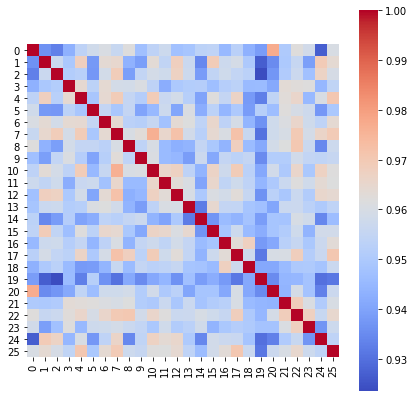

In [5]:
cmat_upper = np.array([df['Cmat'][i][np.triu_indices(80)].flatten().tolist() for i in range(1, 27)])
cmat_upper_corr = np.corrcoef(cmat_upper)
plt.figure(figsize = (7, 7))
_ = sns.heatmap(cmat_upper_corr, cmap='coolwarm', cbar=True, square=True)
cmat_upper_corr[np.triu_indices(26)].mean()

0.6917542455783585

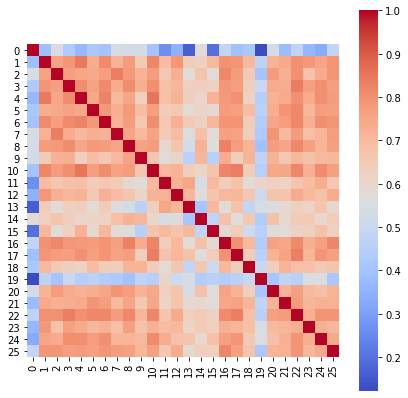

In [6]:
dmat_upper = np.array([df['Dmat'][i][np.triu_indices(80)].flatten().tolist() for i in range(1, 27)])
dmat_upper_corr = np.corrcoef(dmat_upper)
plt.figure(figsize = (7, 7))
_ = sns.heatmap(dmat_upper_corr, cmap='coolwarm', cbar=True, square=True)
dmat_upper_corr[np.triu_indices(26)].mean()

# Inter-subject variability

In [7]:
cmats = np.array([df.loc[i, 'Cmat'] for i in range(1, 27)])

In [8]:
coefficient_of_variation = cmats.std(axis=0) / cmats.mean(axis=0)
np.fill_diagonal(coefficient_of_variation, 0)

c:\users\sebi\documents\studium\10. semester\neuro project\connectivity\ni-project\connectivity\my_env\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


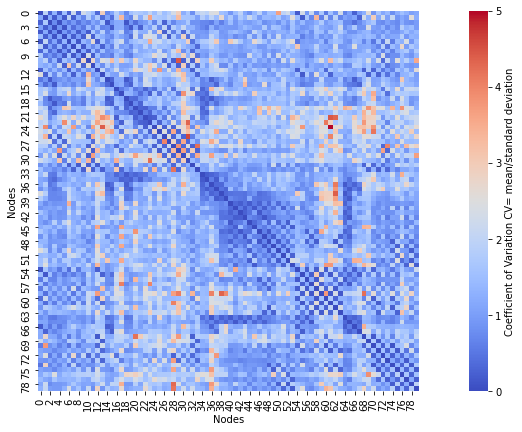

In [9]:
plt.figure(figsize = (18, 7))
heatmap = sns.heatmap(coefficient_of_variation, cmap='coolwarm', cbar=True, square=True, 
                      cbar_kws={"label": "Coefficient of Variation CV= mean/standard deviation"})
plt.xlabel('Nodes')
plt.ylabel('Nodes')
plt.show()

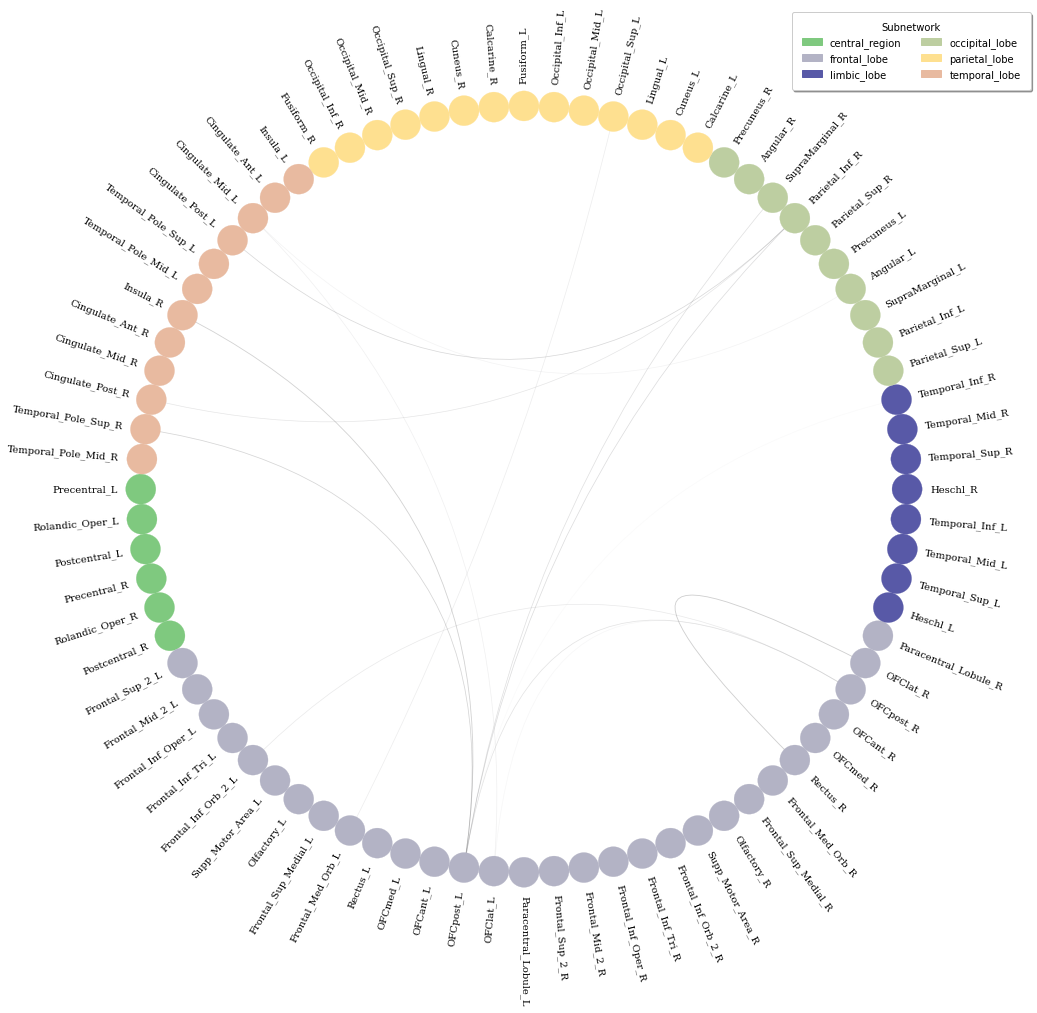

In [10]:
G = make_graph(coefficient_of_variation/coefficient_of_variation.max())
plot_graph_circos(G, sc_threshold=0.7)

# Degree

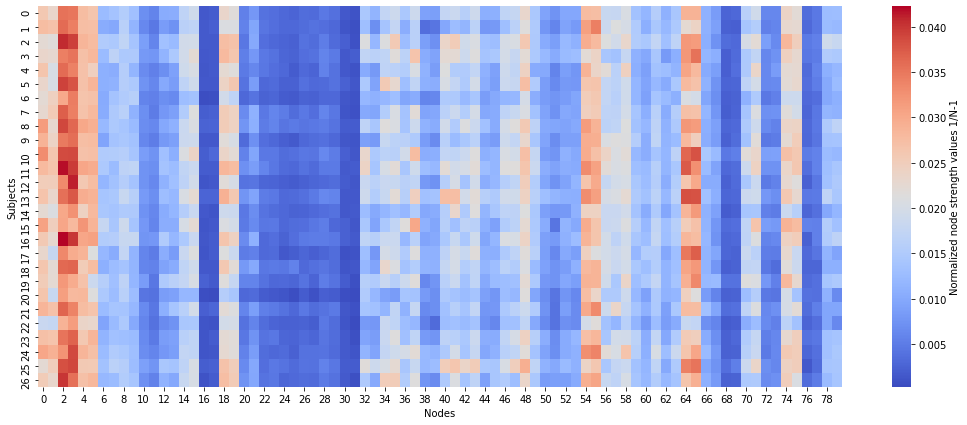

In [11]:
degree = np.array([df.loc[i, 'degree'].tolist() for i in range(27)])
plt.figure(figsize = (18, 7))
_ = sns.heatmap(degree, cmap='coolwarm', cbar=True, square=False, cbar_kws={"label": "Normalized node strength values 1/N-1"})
plt.xlabel('Nodes')
plt.ylabel('Subjects')
plt.show()

# Centrality

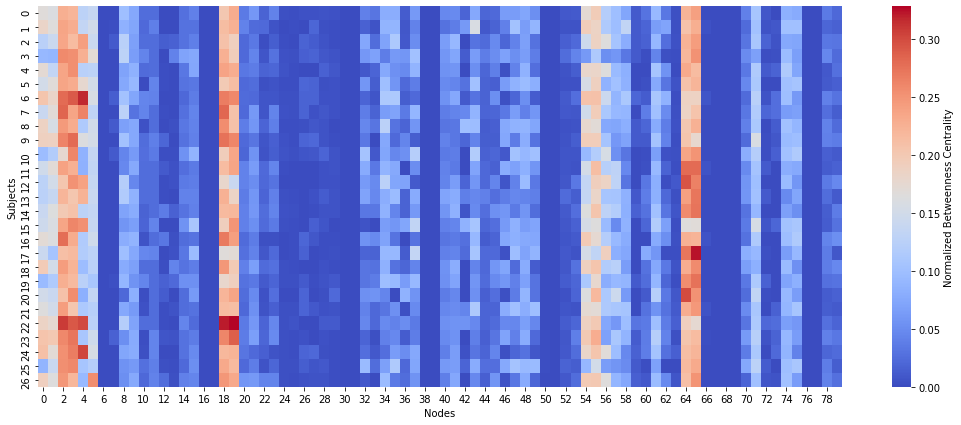

In [12]:
degree = np.array([df.loc[i, 'betweenness'] for i in range(27)])
plt.figure(figsize = (18, 7))
heatmap = sns.heatmap(degree, cmap='coolwarm', cbar=True, square=False, 
                      cbar_kws={"label": "Normalized Betweenness Centrality"})
plt.xlabel('Nodes')
plt.ylabel('Subjects')
plt.show()

In [13]:
betweennesses = np.array([df.loc[i, 'betweenness'] for i in range(27)])
print(np.sum(betweennesses,axis=1))

[4.4222655  4.5183382  4.42518663 4.29146381 4.37000974 4.33430704
 4.83641675 4.55241805 4.48620578 4.46186303 4.19084713 4.39175592
 4.49010062 4.4849075  4.37974684 4.69036027 4.48685492 4.4255112
 4.39240506 4.24505031 4.23012009 4.32846478 4.8380396  4.5647517
 4.42908147 4.28951639 4.54300552]


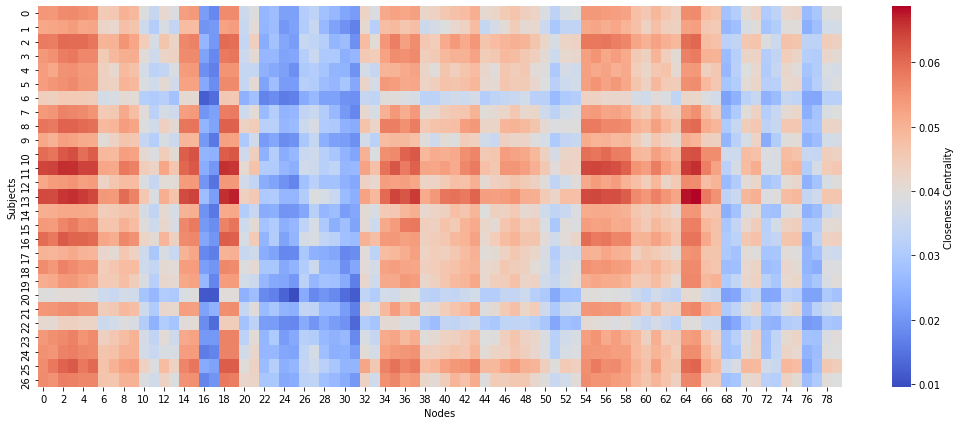

In [14]:
degree = np.array([df.loc[i, 'closeness'] for i in range(27)])
plt.figure(figsize = (18, 7))
heatmap = sns.heatmap(degree, cmap='coolwarm', cbar=True, square=False, 
                      cbar_kws={"label": "Closeness Centrality"})
plt.xlabel('Nodes')
plt.ylabel('Subjects')
plt.show()

# Average shortest path length

c:\users\sebi\documents\studium\10. semester\neuro project\connectivity\ni-project\connectivity\my_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


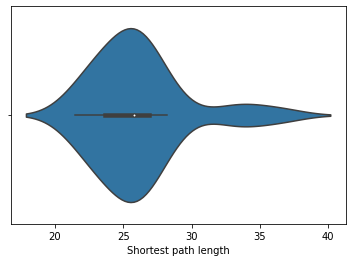

In [15]:
sns.violinplot(df['mean_shortest_path'].values)
plt.xlabel('Shortest path length')
plt.show()

# Average degree of the neighborhood

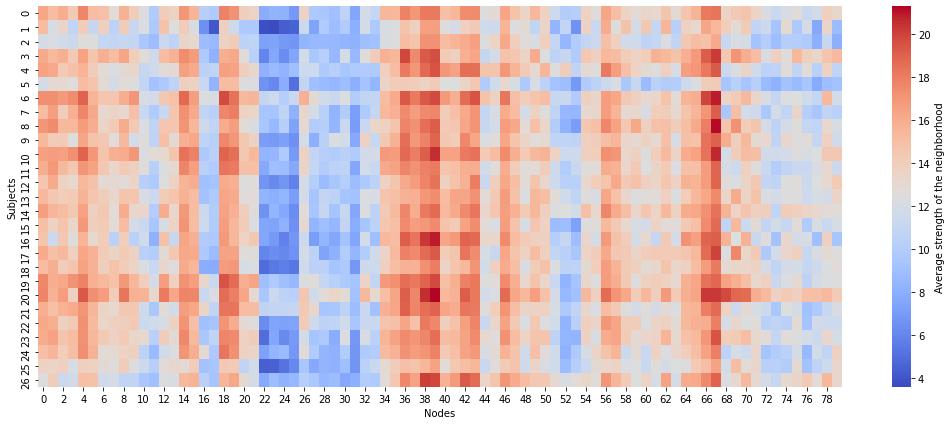

In [6]:
degree = np.array([df.loc[i, 'neighbor_degree'] for i in range(27)])
plt.figure(figsize = (18, 7))
heatmap = sns.heatmap(degree, cmap='coolwarm', cbar=True, square=False, 
                      cbar_kws={"label": "Average strength of the neighborhood"})
plt.xlabel('Nodes')
plt.ylabel('Subjects')
plt.show()

## Average neighborhood degree (new)

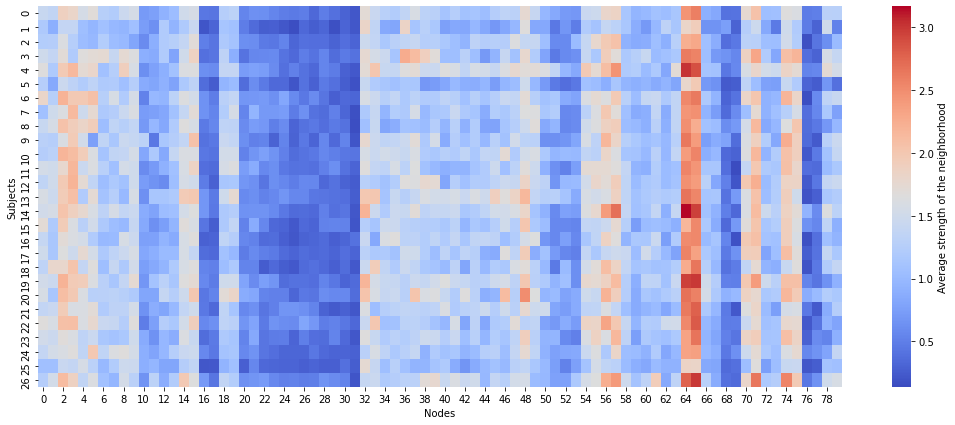

In [7]:
degree = np.array([df.loc[i, 'neighbor_degree_new'] for i in range(27)])
plt.figure(figsize = (18, 7))
heatmap = sns.heatmap(degree, cmap='coolwarm', cbar=True, square=False, 
                      cbar_kws={"label": "Average strength of the neighborhood"})
plt.xlabel('Nodes')
plt.ylabel('Subjects')
plt.show()

## Symmetry study

In [18]:
print(f"These two numbers should be equal: Cmat[0][1] = {ds.Cmat[0][1]} and Cmat[1][0] = {ds.Cmat[1][0]}")
#print(np.sum(ds.Cmat, axis=0))
#print(np.sum(ds.Cmat, axis=1))
#print(G.degree(weight='weight'))

These two numbers should be equal: Cmat[0][1] = 0.0024132456415451747 and Cmat[1][0] = 0.0017804663027135316


In [19]:
print("Check symmetry for input matrices")
for n, (cmat, dmat) in enumerate(zip([ds.Cmat] + ds.Cmats, [ds.Dmat] + ds.Dmats)):
    print(is_symmetric(cmat))
    print(is_symmetric(dmat))

Check symmetry for input matrices
(False, 23.40650849406412, 0.23035152978177698, 0.003657266952197519)
(False, 88621.85154999667, 112.8227840038148, 13.84716430468698)
(False, 25.010375119886348, 0.36630770888045683, 0.003907871112482242)
(False, 114918.65037509799, 344.0, 17.95603912110906)
(False, 32.65660961425844, 0.2802748970636293, 0.0051025952522278815)
(False, 136832.10910508514, 235.633595239, 21.380017047669554)
(False, 32.07584880306735, 0.26586838855277367, 0.005011851375479274)
(False, 127250.37035536431, 225.12270833100007, 19.882870368025674)
(False, 29.550546522105854, 0.2344143372150589, 0.0046172728940790395)
(False, 136406.08185146292, 243.76811904800002, 21.313450289291083)
(False, 28.297659158108484, 0.2931807016948972, 0.004421509243454451)
(False, 125026.89300384361, 199.29516666599997, 19.535452031850564)
(False, 25.376840794490114, 0.2583017073678337, 0.00396513137413908)
(False, 117896.65373360632, 145.78500000200006, 18.421352145875986)
(False, 29.8795567911

In [20]:
G = make_graph(np.matrix(ds.Cmat))
average_neighbor_degree = nx.average_neighbor_degree(G, weight='weight')
print(average_neighbor_degree)
average_neighbor_degree = nx.average_neighbor_degree(G, weight='none')
print(average_neighbor_degree)

{0: 16.27937217226233, 1: 15.15936961733427, 2: 15.927764550524378, 3: 14.333440433613847, 4: 17.636250788392054, 5: 15.081556833973668, 6: 14.869468643929299, 7: 12.775330021862215, 8: 15.701355161939901, 9: 13.970285943352666, 10: 12.230863497345887, 11: 9.813144689887851, 12: 14.012991820615182, 13: 13.685963188830199, 14: 17.047656400825932, 15: 15.554508687121208, 16: 10.162670126985564, 17: 9.800621542365437, 18: 17.780085316130823, 19: 17.16947649182546, 20: 13.913883783005504, 21: 13.603177650029838, 22: 7.823729403462572, 23: 8.231933922012498, 24: 8.20812959871958, 25: 6.8306382341302525, 26: 13.687479326563638, 27: 9.598720019208207, 28: 9.39637891754531, 29: 8.973510667390439, 30: 10.616740194990614, 31: 7.4582864283397, 32: 11.75204144208085, 33: 10.952172988184353, 34: 15.448313200180593, 35: 15.363727117746711, 36: 17.82186894672524, 37: 16.92673291091384, 38: 18.15414544727781, 39: 18.124056440426685, 40: 14.985379522999263, 41: 15.439343767184887, 42: 17.35460704659794

In [21]:
if False:
    N = neighborhoods(ds.Cmat)
    print(np.sum(N))
    print(79*80)
    N = normalize_neighborhoods(N)
    print(N)
    assert(80.0 == np.sum(N))
    degrees = np.sum(ds.Cmat, axis=0)
    avg_nb_deg = avg_neighborhood_degree(ds.Cmat)
    print(np.mean(degrees))
    print(np.mean(avg_nb_deg))

In [22]:
A = np.array([[0,1,10],
              [1,0,5],
              [10,5,0]])
G = make_graph(A)
print(G.degree(weight='weight'))
average_neighbor_degree = nx.average_neighbor_degree(G, weight='weight')
print(average_neighbor_degree)

[(0, 11.0), (1, 6.0), (2, 15.0)]
{0: 2.0, 1: 2.0, 2: 2.0}


In [23]:
A = np.array([[0,1,0],
              [1,0,1],
              [0,1,0]])

G = make_graph(A)
betweenness = nx.betweenness_centrality(G, weight='weight',
                                            normalized=True)
print(betweenness)
closeness = nx.closeness_centrality(G)
print(closeness)

G = make_graph(10*A)
betweenness = nx.betweenness_centrality(G, weight='weight',
                                            normalized=True)
print(betweenness)
closeness = nx.closeness_centrality(G)
print(closeness)

{0: 0.0, 1: 1.0, 2: 0.0}
{0: 0.6666666666666666, 1: 1.0, 2: 0.6666666666666666}
{0: 0.0, 1: 1.0, 2: 0.0}
{0: 0.6666666666666666, 1: 1.0, 2: 0.6666666666666666}


In [24]:
A = np.random.rand(80,80)
G = make_graph(A)
betweenness = nx.betweenness_centrality(G, weight='weight',
                                            normalized=True)
print(betweenness)
closeness = nx.closeness_centrality(G)
print(closeness)

G = make_graph(10*A)
betweenness = nx.betweenness_centrality(G, weight='weight',
                                            normalized=True)
print(betweenness)
closeness = nx.closeness_centrality(G)
print(closeness)

{0: 0.0, 1: 0.014605647517039922, 2: 0.024342745861733205, 3: 0.014605647517039922, 4: 0.021421616358325218, 5: 0.03537812398571892, 6: 0.009087958455047063, 7: 0.07400194741966894, 8: 0.013956507627393703, 9: 0.00551768906199286, 10: 0.0022719896137617657, 11: 0.04738721194417397, 12: 0.0311587147030185, 13: 0.02044790652385589, 14: 0.008114248620577734, 15: 0.0311587147030185, 16: 0.017851346965271016, 17: 0.07335280753002271, 18: 0.007465108730931516, 19: 0.023044466082440766, 20: 0.0029211295034079843, 21: 0.012333657903278157, 22: 0.0029211295034079843, 23: 0.011359948068808828, 24: 0.017202207075624795, 25: 0.014605647517039922, 26: 0.0, 27: 0.0038948393378773127, 28: 0.007789678675754625, 29: 0.012333657903278157, 30: 0.012982797792924375, 31: 0.0016228497241155468, 32: 0.0019474196689386564, 33: 0.006815968841285297, 34: 0.0032456994482310936, 35: 0.013956507627393703, 36: 0.003570269393054203, 37: 0.0006491398896462187, 38: 0.021421616358325218, 39: 0.02044790652385589, 40: 0.

# Clustering Coefficient

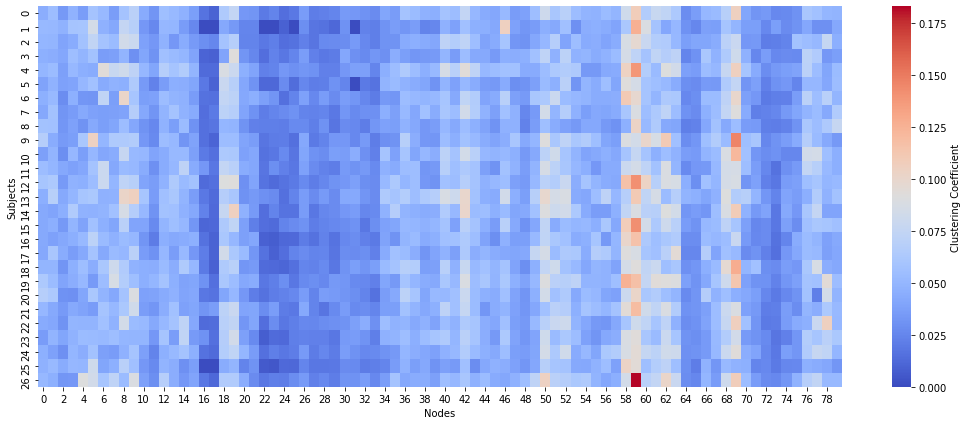

In [8]:
degree = np.array([df.loc[i, 'clustering_coefficient'] for i in range(27)])
plt.figure(figsize = (18, 7))
heatmap = sns.heatmap(degree, cmap='coolwarm', cbar=True, square=False, 
                      cbar_kws={"label": "Clustering Coefficient"})
plt.xlabel('Nodes')
plt.ylabel('Subjects')
plt.show()	

# Distribution of the graph measurements between participants

In [9]:
df_z = z_scores(df)
df_corr = similarity_between_subjects(df)

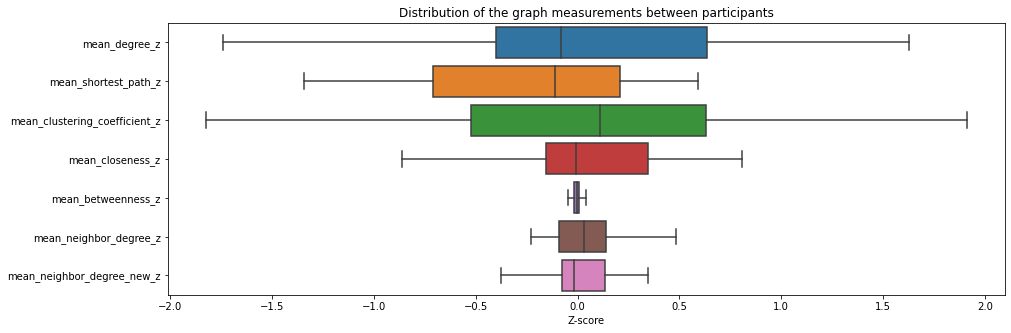

In [10]:
plt.figure(figsize=(15,5))
melted_df = pd.melt(df_z, id_vars=['subject'])
sns.boxplot(data=melted_df, x='value', y='variable', showfliers=False)
plt.xlabel('Z-score')
plt.ylabel('')
plt.title('Distribution of the graph measurements between participants')
plt.show()

In [28]:
#plt.figure(figsize=(15,5))
#melted_df = pd.melt(, id_vars=['subject'])
#sns.boxplot(data=melted_df, x='value', y='variable', showfliers=False)
#plt.xlabel('Correlation')
#plt.ylabel('')
#plt.title('Correlation to the average measurements')
#plt.show()

# Clustermap

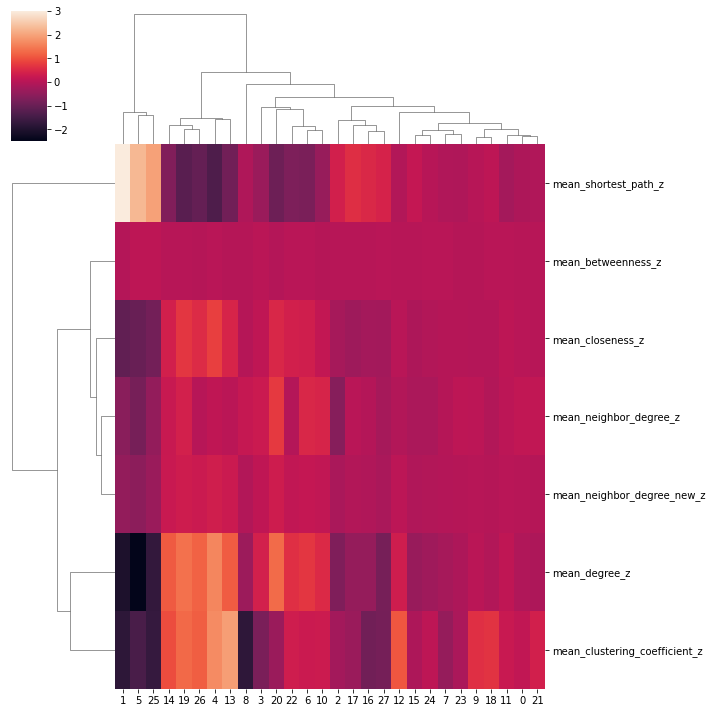

In [5]:
# Classtermap similarity between participants and measurements
sns.clustermap(df_z.iloc[:, 1:].T)
plt.show()

# CircosPlot

In [ ]:
# Structural connectivity average Cmap
G = make_graph(df.loc[0, 'Cmat'])
plot_graph_circos(G, sc_threshold=0.2)

In [ ]:
# Structural connectivity subject 26
G = make_graph(df.loc[22, 'Cmat'])
plot_graph_circos(G, sc_threshold=0.2)

# Minimum Spanning Trees

In [ ]:
freq_mst = np.zeros_like(df.loc[0, 'backbone'])
for i in range(1, 27):
    freq_mst += df.loc[i, 'backbone']

freq_mst /= 26

In [ ]:
plt.figure(figsize = (18, 7))
heatmap = sns.heatmap(freq_mst, cmap='coolwarm', cbar=True, square=True, 
                      cbar_kws={"label": "Probability of the node to be in the minimum spanning trees"})
plt.xlabel('Nodes')
plt.ylabel('Nodes')
plt.show()

In [ ]:
G = make_graph(freq_mst * 10)
plot_graph_circos(G)

# Test models

In [ ]:
from neurolib.models.aln import ALNModel
model = ALNModel(Cmat=ds.Cmats[26], Dmat=ds.Dmats[26])
model.params['dt'] = 0.1
model.params['duration'] = 20 * 1000  # ms

# add custom parameter for downsampling results
# 10 ms sampling steps for saving data, should be multiple of dt
model.params['save_dt'] = 10.0
model.params["tauA"] = 600.0
model.params["sigma_ou"] = 0.0
model.params["b"] = 20.0

model.params["Ke_gl"] = 300.0
model.params["signalV"] = 80.0
model.params["mue_ext_mean"] = 1.5
model.params["mui_ext_mean"] = 0.2


In [ ]:
model.run()

In [ ]:
model.output.shape

In [ ]:
plt.plot(np.arange(0, 10000), model.output[56, 10000:10000*2])

In [ ]:
plt.figure(figsize=(12, 6))
plt.imshow(model.output[:, :10000], aspect='auto') # Aspect=1.2